# ML-Dev-Ease-Classification-vs.-Generation
This notebook contains all the analysis and plots.

In [1]:
import pandas as pd
from ast import literal_eval
from matplotlib import pyplot as plt

In [242]:
plt.style.use('ggplot')

## Step 2.5 - Comparing ML Apps

In [8]:
spaces_df = pd.read_csv('../data/spaces_extra.csv')
models_df = pd.read_csv('../data/models.csv')

### Getting a Sense of Data

In [9]:
# How many spaces exist in total?
n_spaces = spaces_df.shape[0]
print(f"N.spaces: {n_spaces}")

# How many spaces have specified the models they used?
n_spaces_models = spaces_df.loc[spaces_df['models'].notna()].shape[0]
print(f"N.spaces with specified models: {n_spaces_models}")

N.spaces: 175690
N.spaces with specified models: 38982


### Preprocess

In [10]:
# Remove spaces that have not specified models
spaces_df = spaces_df.loc[spaces_df['models'].notna()].copy()

In [11]:
spaces_df['models'] = spaces_df['models'].apply(literal_eval)   # Typecast

# Transform column 'models' of type list into rows
spaces_models_df = spaces_df.explode(
    column = 'models',
    ignore_index = True
).rename(
    columns = {
        'models': 'model'   # Make it singular since it's only one model now
    }
)

print(f"N.models: {spaces_models_df.shape[0]}")
print(f"N.unqiue models: {spaces_models_df['model'].nunique()}")

N.models: 104448
N.unqiue models: 15239


In [13]:
# Remove models other than our selected ones (from 'models.csv')
spaces_models_df = spaces_models_df.loc[spaces_models_df['model'].isin(models_df['name'])]
print(f"N.in-domain models: {spaces_models_df.shape[0]}")
print(f"N.spaces with in-domain models: {spaces_models_df['name'].nunique()}")

N.in-domain models: 4375
N.spaces with in-domain models: 3737


In [40]:
# Remove irrelevant features
models_df = models_df[['name', 'tag', 'pipeline_tag']].rename(
    columns = {
        'name': 'model'
    }
)
spaces_models_df = spaces_models_df[['name', 'model']].rename(
    columns = {
        'name': 'space'
    }
)

# Merge two DataFrames into one
spaces_models_df = spaces_models_df.merge(models_df)
spaces_models_df.head(3)

,space,model,tag,pipeline_tag
0,Anthos23/hummus,mrm8488/distilroberta-finetuned-financial-news...,text-classification,text-classification
1,sohomghosh/FLUEnT,mrm8488/distilroberta-finetuned-financial-news...,text-classification,text-classification
2,slachitoff/CS-GY_6613_Project,mrm8488/distilroberta-finetuned-financial-news...,text-classification,text-classification


### Exploratory Data Analysis

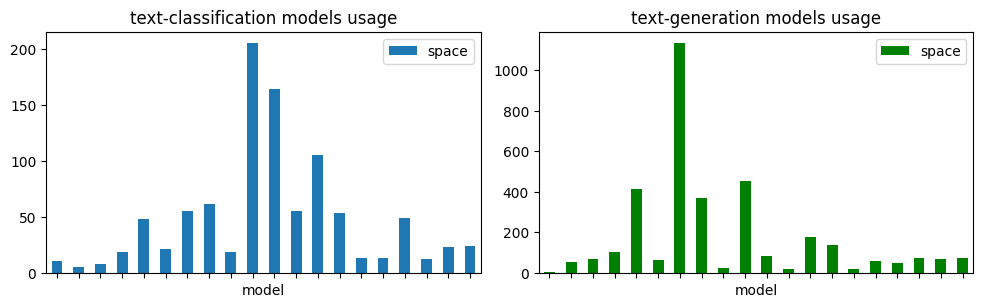

In [103]:
# Usage in spaces for both 'text classification' and 'text generation' models

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
fig.tight_layout()

# Text Classification plot
spaces_models_df.loc[spaces_models_df['tag'] == 'text classification'].groupby(
    by = 'model',
    as_index = False
).count().plot.bar(x='model', y='space', ax=axes[0], subplots=True)

# Text Generation plot
spaces_models_df.loc[spaces_models_df['tag'] == 'text generation'].groupby(
    by = 'model',
    as_index = False
).count().plot.bar(x='model', y='space', ax=axes[1], subplots=True, color='green')

# Set subtitles
axes[0].title.set_text('text-classification models usage')
axes[1].title.set_text('text-generation models usage')

# Remove xlabels
for tick in axes[0].get_xticklabels() + axes[1].get_xticklabels():
    tick.set_visible(False)
plt.show()

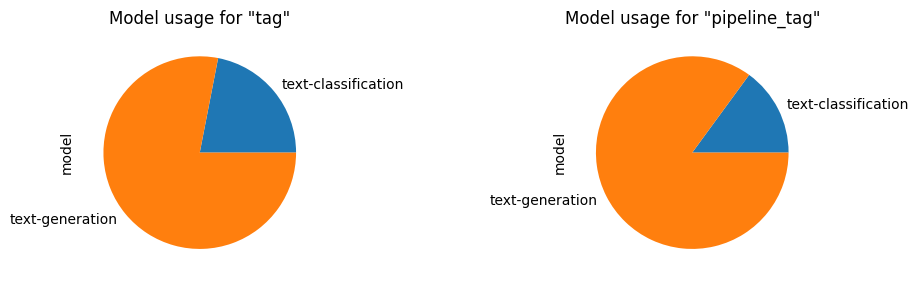

In [120]:
# Model usage per tags. Since there are two types of "tag" and "pipeline_tag", both are plotted.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
fig.tight_layout()

# Model usage per "tag" column
spaces_models_df.groupby(
    by = 'tag',
    as_index = False
).count().set_index('tag').plot.pie(y='model', legend=False, ax=axes[0], subplots=True)

# Model usage per "pipeline_tag" column
spaces_models_df.loc[spaces_models_df['pipeline_tag'].isin(['text-classification', 'text-generation'])].groupby(
    by = 'pipeline_tag',
    as_index = False
).count().set_index('pipeline_tag').plot.pie(y='model', legend=False, ax=axes[1], subplots=True)

# Set subtitles
axes[0].title.set_text('Model usage for "tag"')
axes[1].title.set_text('Model usage for "pipeline_tag"')

plt.show()

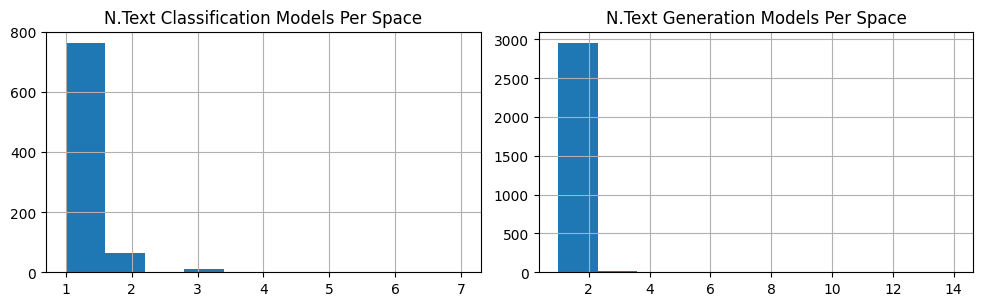

In [152]:
# Distribution for number of models used in spaces

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
fig.tight_layout()

# Text Classification
spaces_models_df.loc[spaces_models_df['tag'] == 'text-classification'].groupby(
    by = ['space'],
    as_index = False
).count()['model'].hist(ax=axes[0])

# Text Generation
spaces_models_df.loc[spaces_models_df['tag'] == 'text-generation'].groupby(
    by = ['space'],
    as_index = False
).count()['model'].hist(ax=axes[1])

# Set subtitles
axes[0].title.set_text('N.Text Classification Models Per Space')
axes[1].title.set_text('N.Text Generation Models Per Space')

plt.show()

## 3.5 - Comparing ML Repositories

In [298]:
files_df = pd.read_csv('../data/files.csv')

### Getting a Sence of Data

In [279]:
# How many spaces we failed to get fetch?
failed_spaces = files_df.loc[files_df['n_files'].isna()].shape[0]
print(f"N.spaces failed to retreive information from: {failed_spaces} (Err Codes: 401, 404, ...)")

# How many spaces have over 1000 files?
large_spaces = files_df.loc[files_df['n_files'] > 1000].shape[0]
print(f"N.very large spaces (over 1000 files): {large_spaces}")

# How many files for largest space?
largest_space = files_df['n_files'].max()
print(f"N.files for largest space: {int(largest_space)}")

# What is the largest space, according to its size?
heaviest_space = files_df['size'].max()
print(f"Size of the heaviest space: {heaviest_space // (1024**2)} MB")

N.spaces failed to retreive information from: 4 (Err Codes: 401, 404, ...)
N.very large spaces (over 1000 files): 73
N.files for largest space: 52243
Size of the heaviest space: 135.0 MB


### Preprocess

In [280]:
files_df['size'] = files_df['size'] / (1024**2)    # B to MB

# Rename columns
files_df = files_df.rename(
    columns = {
        'name': 'space'
    }
)

# Merge DataFrames
files_models_df = files_df.merge(spaces_models_df)
files_models_df.tail(3)

,space,size,n_files,model,tag,pipeline_tag
4372,gradio/unified_demo_text_generation_3-x,0.002952,5.0,gpt2,text-generation,text-generation
4373,Abhaykoul/HelpingAI-T4,0.000768,9.0,mistralai/Mistral-7B-Instruct-v0.1,text-generation,text-generation
4374,ShreyanshDave/InterviewPreparation,0.334087,5.0,meta-llama/Llama-2-7b-chat-hf,text-generation,text-generation


### Exploratory Data Analysis

In [292]:
temp_tc_df = files_models_df.loc[files_models_df['tag'] == 'text-classification']
temp_tg_df = files_models_df.loc[files_models_df['tag'] == 'text-generation']

In [295]:
# Text-Classification
(temp_tc_df['size'] * 1024).describe()  # In MB

count       939.000000
mean       2669.849044
std       15108.164242
min           1.338867
25%           2.727539
50%          10.007812
75%         247.702637
max      138702.900391
Name: size, dtype: float64

In [294]:
# Text-Generation
(temp_tg_df['size'] * 1024).describe()  # In MB

count     3257.000000
mean       660.900175
std       2855.586638
min          0.786133
25%          1.827148
50%          8.985352
75%        142.981445
max      76194.975586
Name: size, dtype: float64

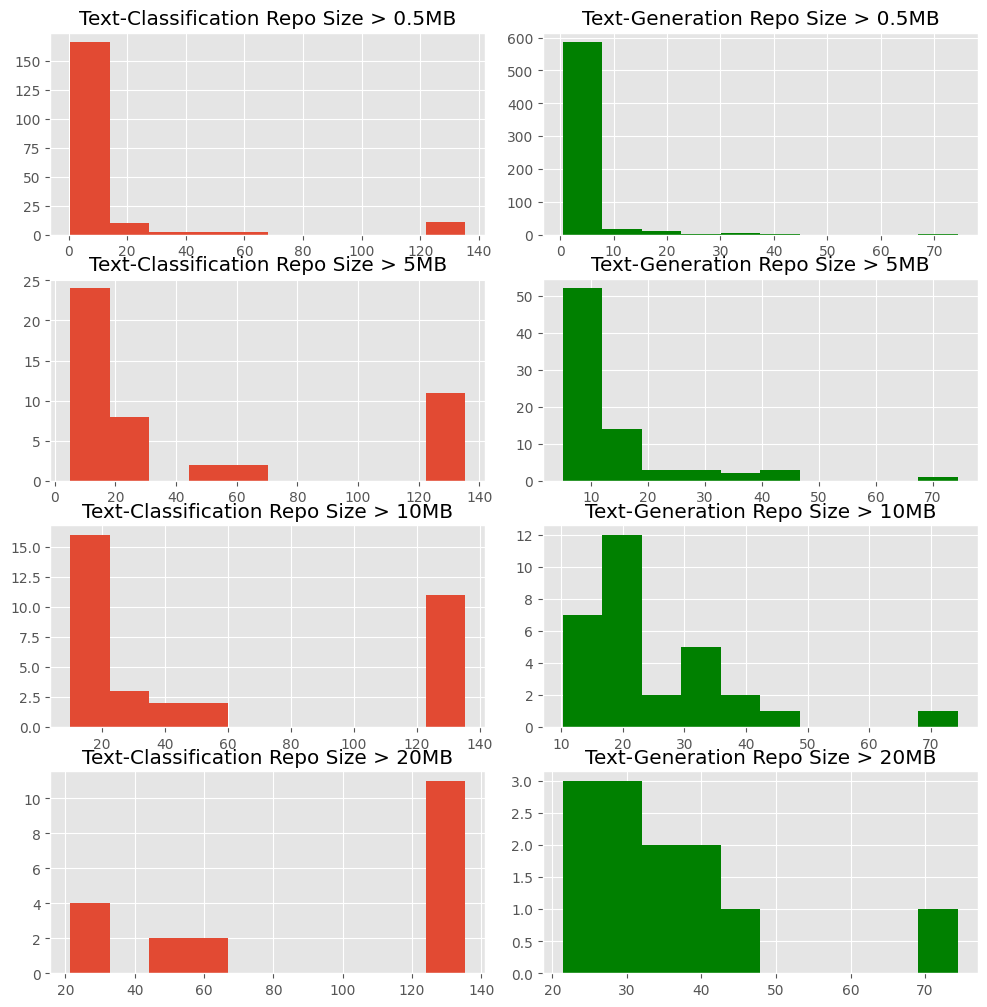

In [281]:
# Number of files files and size of repository

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
fig.tight_layout()

# Histograms of number repository files with different thresholds
sizes = [0.5, 5, 10, 20]
for i, size in enumerate(sizes):
    temp_tc_df.loc[temp_tc_df['size'] > size, 'size'].hist(ax=axes[i, 0])
    axes[i, 0].title.set_text(f'Text-Classification Repo Size > {size}MB')

# Histograms of number repository files with different thresholds
for i, size in enumerate(sizes):
    temp_tg_df.loc[temp_tg_df['size'] > size, 'size'].hist(ax=axes[i, 1], color='g')
    axes[i, 1].title.set_text(f'Text-Generation Repo Size > {size}MB')

plt.show()